In [7]:
import numpy as np
import scipy.ndimage
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [9]:
home = os.getcwd().split('AUT-CNN-TUB')[0]
canon_path  = os.path.join(home,'AUT-CNN-TUB/Data/AllParts/canon')
industy_path  = os.path.join(home,'/home/jeronimo/git/AUT-CNN-TUB/Data/AllParts/industry')
mixed_path  = os.path.join(home,'AUT-CNN-TUB/Data/AllParts')

In [103]:
img_name = os.listdir(os.path.join(home,industy_path))[110]
file_path = os.path.join(home,industy_path, img_name)
image = cv2.imread(file_path)

In [104]:
kernel_faktor = int(image.shape[1] * (0.018) -8)
kernel_faktor

15

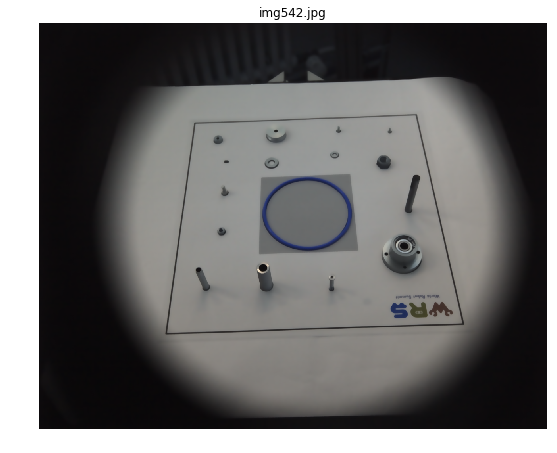

In [105]:
blurred = cv2.bilateralFilter(image,10, 50, 50)

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(1, 2, 1)
ax1.axis('off')
ax1.set_title(file_path.split('/')[-1])
ax1.imshow(blurred)
plt.show()

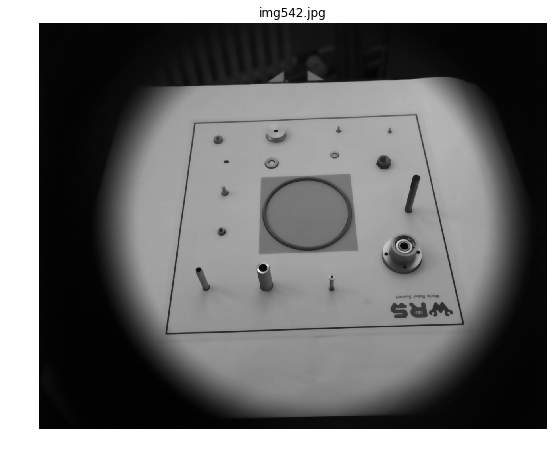

In [106]:
imgray = cv2.cvtColor(blurred,cv2.COLOR_BGR2GRAY)

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(1, 2, 1)
ax1.axis('off')
ax1.set_title(file_path.split('/')[-1])
ax1.imshow(imgray , cmap='gray')
plt.show()

In [107]:
form_factor = imgray.shape[1]/1280
form_factor

1.0

In [108]:
brightness1 = imgray.mean()
brightness1

79.0791389465332

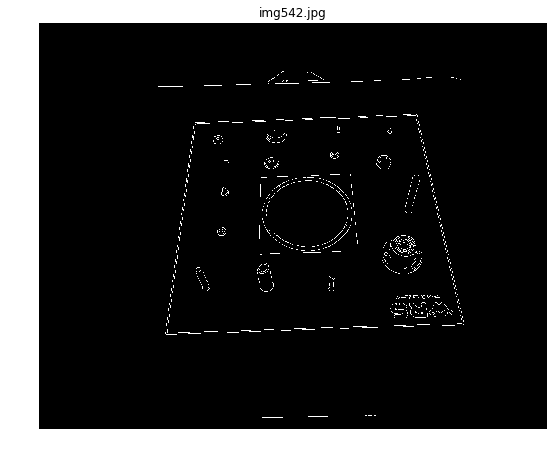

In [109]:
thresh = cv2.Canny(imgray,brightness1,brightness1)

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(1, 2, 1)
ax1.axis('off')
ax1.set_title(file_path.split('/')[-1])
ax1.imshow(thresh, cmap='gray')
plt.show()

In [110]:
kernel_faktor

15

In [111]:
form_factor = imgray.shape[1]/1280
form_factor

1.0

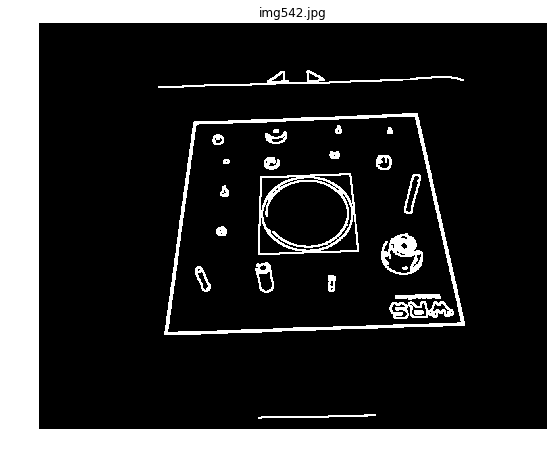

In [112]:
#kernel = np.ones((kernel_faktor,kernel_faktor),np.uint8)
kernel = np.ones((int(5 * form_factor),int(5 * form_factor)),np.uint8)

dilation = cv2.dilate(thresh,kernel,iterations = 1)

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(1, 2, 1)
ax1.axis('off')
ax1.set_title(file_path.split('/')[-1])
ax1.imshow(dilation, cmap='gray')
plt.show()

In [113]:
h, b = dilation.shape

h*.6,b*.6

(614.4, 768.0)

In [114]:
h, b = thresh.shape
faktor = 0.5

_,contours,_ = cv2.findContours(dilation,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
mask = np.zeros(thresh.shape,np.uint8)
sub_contour = [] 
for c in contours:
    if ((
        c[:,:,0].max()-c[:,:,0].min()) > b * faktor and (
        c[:,:,1].max()-c[:,:,1].min()) > h * faktor):
        
        print(len(c))    
        sub_contour.append(c)

area = (cv2.drawContours(mask, [sub_contour[-1]], 0, (1,1,1), -1))

485
472


In [115]:
len(sub_contour[-1])

472

In [116]:
area_new = cv2_clipped_zoom(area,0.90 )

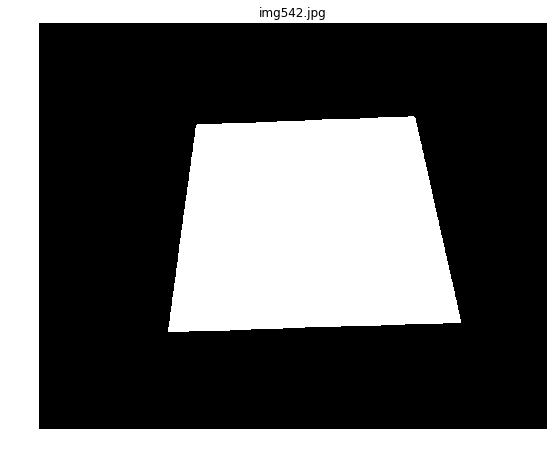

In [117]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(1, 2, 1)
ax1.axis('off')
ax1.set_title(file_path.split('/')[-1])
ax1.imshow(area,  cmap='gray')
plt.show()

In [118]:
area.sum()

337963

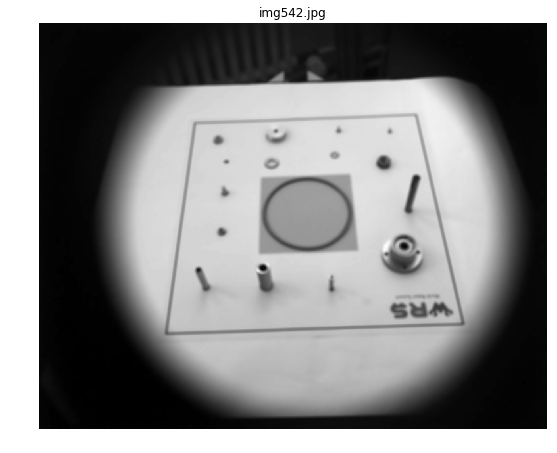

In [119]:
blurred = cv2.bilateralFilter(imgray,10, 1000, 1000)

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(1, 2, 1)
ax1.axis('off')
ax1.set_title(file_path.split('/')[-1])
ax1.imshow(blurred, cmap='gray')
plt.show()

In [120]:
brightness = (imgray*closing).mean()/kernel_faktor
brightness

0.1447845458984375

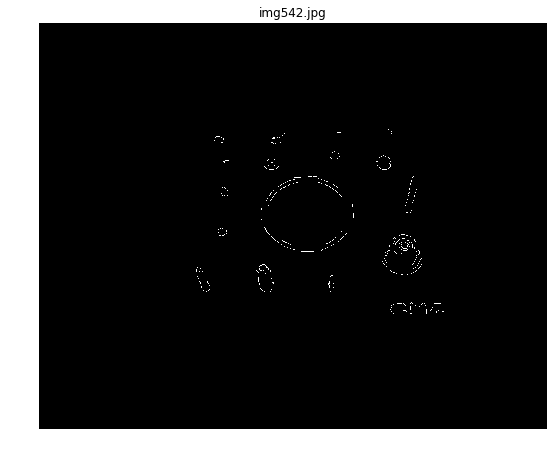

In [121]:
thresh2 = cv2.Canny(blurred, kernel_faktor * 4, kernel_faktor * 4)

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(1, 2, 1)
ax1.axis('off')
ax1.set_title(file_path.split('/')[-1])
ax1.imshow(thresh2*area_new, cmap='gray')
plt.show()

In [122]:
form_factor = thresh.shape[1]/1280
form_factor

1.0

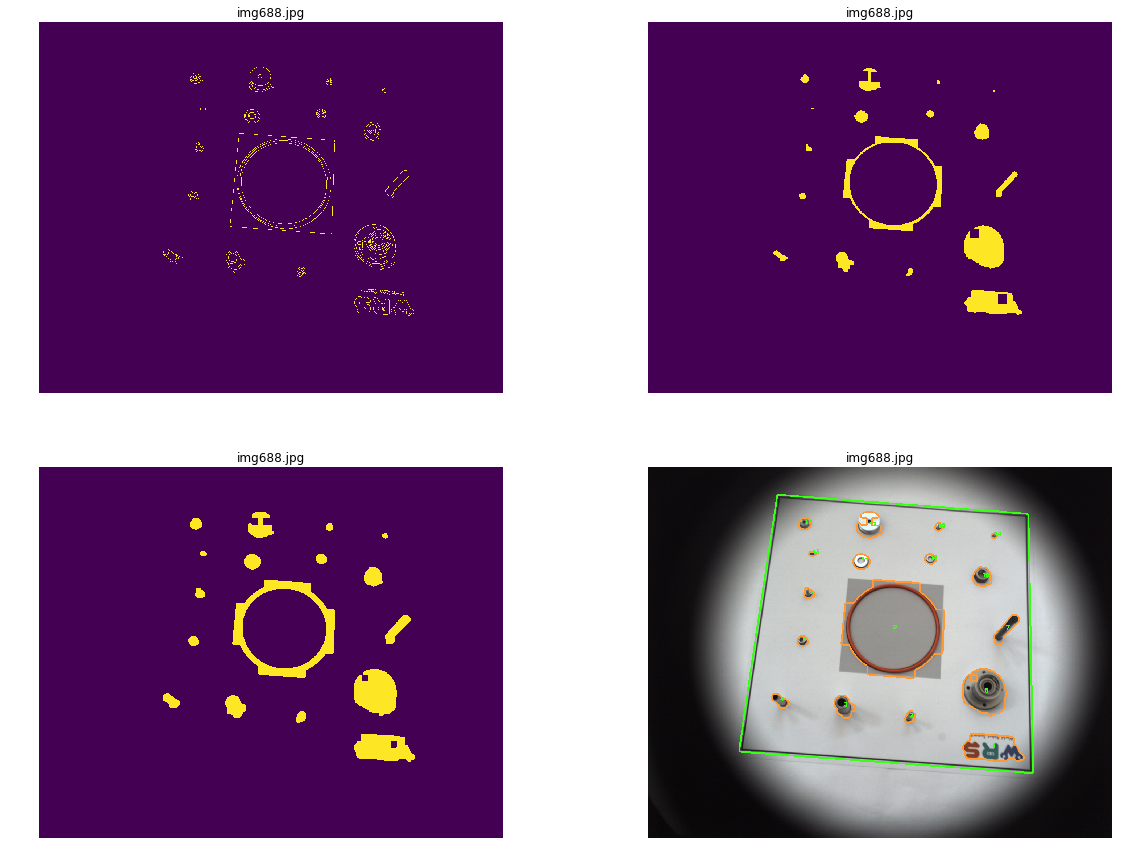

img688.jpg


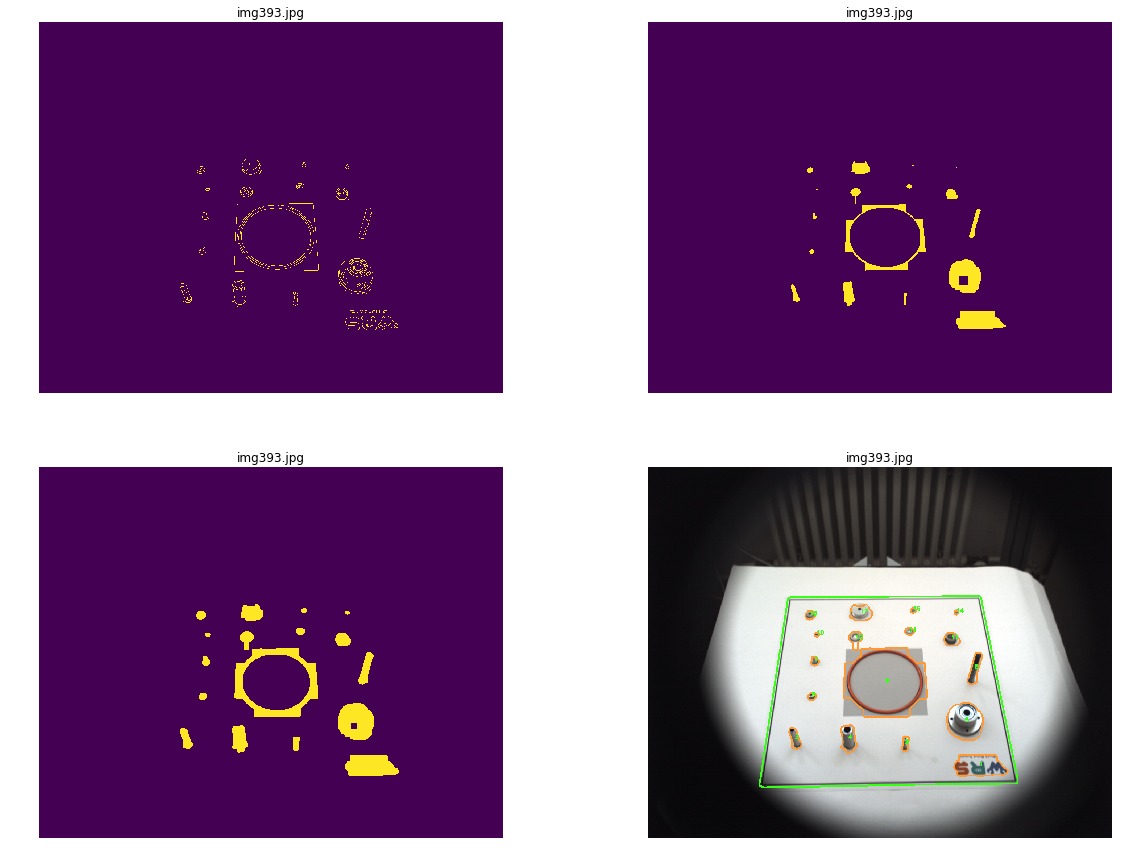

img393.jpg


In [39]:
path = industy_path # industy_path,  canon_path
for image_path in os.listdir(os.path.join(home,path))[:2]:
    
    img_name = image_path
    file_path = os.path.join(home,path, img_name)
    image = cv2.imread(file_path)
 
    kernel_faktor = int(image.shape[1] * (0.018) - 8)
    
    blurred = cv2.bilateralFilter(image,10, 50, 50)
    imgray = cv2.cvtColor(blurred,cv2.COLOR_BGR2GRAY)
    
    form_factor = imgray.shape[0]/1024

    brightness1 = imgray.mean()/kernel_faktor*4
    
    thresh = cv2.Canny(imgray,brightness1,brightness1)
    
    kernel = np.ones((int(5 * form_factor),int(5 * form_factor)),np.uint8)
    dilation = cv2.dilate(thresh,kernel,iterations = 2)
     
        
    h, b = thresh.shape
    faktor = 0.5
    _,contours,_ = cv2.findContours(dilation,
                                    cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    mask = np.zeros(imgray.shape,np.uint8)
    sub_contour = [] 
    for c in contours:
        if ((
            c[:,:,0].max()-c[:,:,0].min()) > b * faktor and (
            c[:,:,1].max()-c[:,:,1].min()) > h * faktor):
            
            #print(len(c))    
            sub_contour.append(c)

    area = (cv2.drawContours(mask, sub_contour, 0, (1,1,1), -1))    
   
    kernel =  cv2.getStructuringElement(cv2.MORPH_ELLIPSE,
                                        (int(20 * form_factor),
                                         int(20 * form_factor)))
    erosion = cv2.erode(area ,kernel,iterations = 2)
    
    area_new = erosion
    
    _,contours,_ = cv2.findContours(area_new,
                                    cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    
    for c in contours:
        if ((c[:,:,0].max()-c[:,:,0].min()) > b * faktor and (
            c[:,:,1].max()-c[:,:,1].min()) > h * faktor):
            sub_contour.append(c)
    frame =  sub_contour
    
    if area.sum() < 50000 / form_factor:
        print(img_name + ' bad image, no frame detected')

    else:
        blurred = cv2.bilateralFilter(imgray,10, 10, 10)
        
        brightness = (imgray * area_new).mean() / 2  * form_factor
        thresh2 = cv2.Canny(blurred,30,30)# brightness, brightness)
        
        kernel =  cv2.getStructuringElement(cv2.MORPH_RECT, (20,20))
        dilation1 = cv2.dilate(thresh2*area_new,kernel,iterations = 1)

        kernel =  cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
        erosion = cv2.erode(dilation1,kernel,iterations = 12
                           )
                
        kernel =  cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10,10))
        dilation2 = cv2.dilate(erosion,kernel,iterations = 1)

        
        sub_contour = []
        _,contours,_ = cv2.findContours(dilation2, cv2.RETR_TREE,
                                        cv2.CHAIN_APPROX_SIMPLE)
        #for c in contours:
         #   if len(c) > 12 * form_factor:  
          #      sub_contour.append(c)
        sub_contour= contours
        
        center = []
        counter = 0
        for c in sub_contour:
            counter += 1
            # compute the center of the contour
            M = cv2.moments(c)
            try:
                cx = int(M["m10"] / M["m00"])
                cy = int(M["m01"] / M["m00"])
                center.append([cx , cy ])
            except:
                print('moment is zero')

        center = np.array(center)

        to_drop = []
        for e,c in enumerate(sub_contour):
            for n,test in enumerate(sub_contour):
                if n!= e:
                    if c[:,:,0].max() < test[:,:,0].max():
                        if c[:,:,0].min()  >  test[:,:,0].min():
                            if c[:,:,1].max() < test[:,:,1].max():
                                if c[:,:,1].min() > test[:,:,1].min():
                                    if len(c) is not len(test): 
                                        to_drop.append(e)
                                    
        sub_con = np.delete(sub_contour, to_drop).tolist()
        #sub_con = sub_contour

        center = np.delete(center,to_drop,0)
        if len(center) is not 17  :
            print('ERROR: ', len(center), 'parts detectet', img_name) 
        else:
            img = cv2.drawContours(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), sub_con, -3, (255, 153, 51), int(3 ))

            for e,ce in enumerate(center,1):
                cv2.putText(img, str(e), (ce[0] , ce[1]),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (57, 255,20), int(2 ))

            cv2.drawContours(img, frame, 0, (57, 255,20), int(3 ))

            img = cv2.drawContours(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), sub_con, -3, (255, 153, 51), int(3 ))


            fig = plt.figure(figsize=(20,15))
            ax1 = fig.add_subplot(2, 2, 1)
            ax1.axis('off')
            ax1.set_title(file_path.split('/')[-1])
            ax1.imshow(thresh2*area_new)

            ax2 = fig.add_subplot(2, 2, 2)
            ax2.axis('off')
            ax2.set_title(file_path.split('/')[-1])
            ax2.imshow(erosion, )

            ax3 = fig.add_subplot(2, 2, 3)
            ax3.axis('off')
            ax3.set_title(file_path.split('/')[-1])
            ax3.imshow(dilation2, cmap='gray')

            ax4 = fig.add_subplot(2, 2, 4)
            ax4.axis('off')
            ax4.set_title(file_path.split('/')[-1])
            ax4.imshow(img)
            plt.show()
            print(img_name)

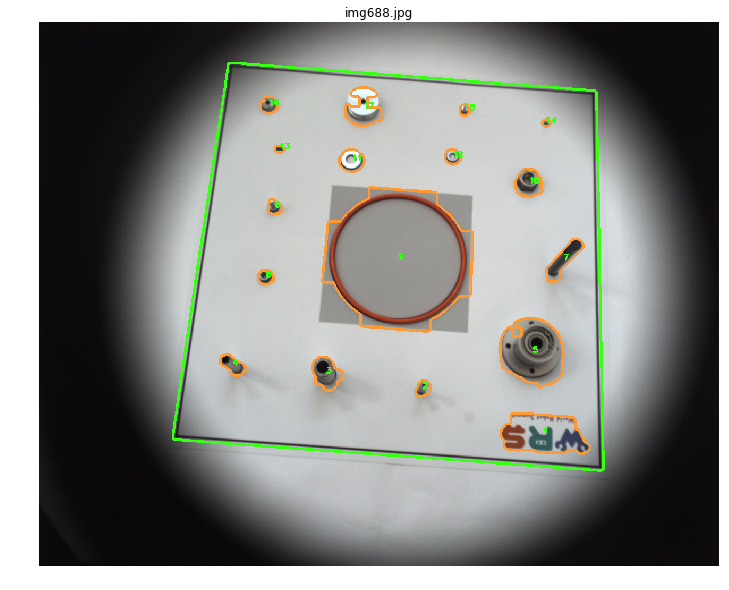

img688.jpg


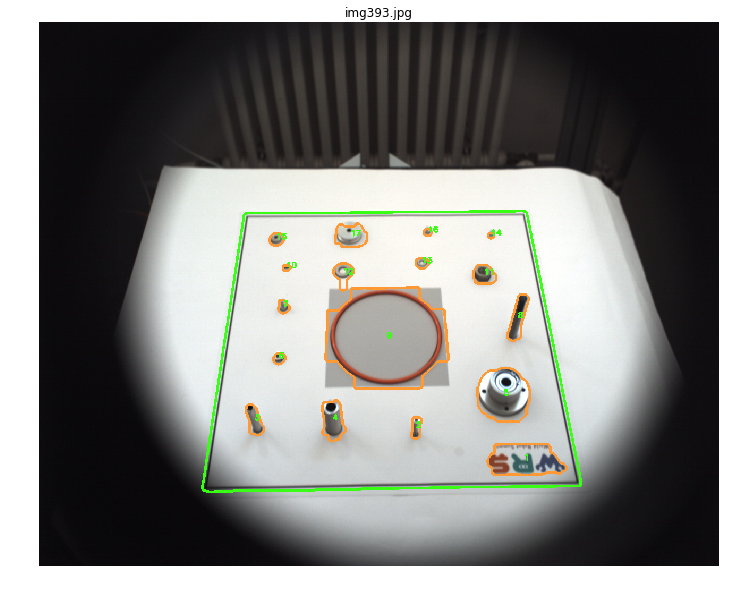

img393.jpg
ERROR:  19 parts detectet img535.jpg
ERROR:  19 parts detectet img1026.jpg


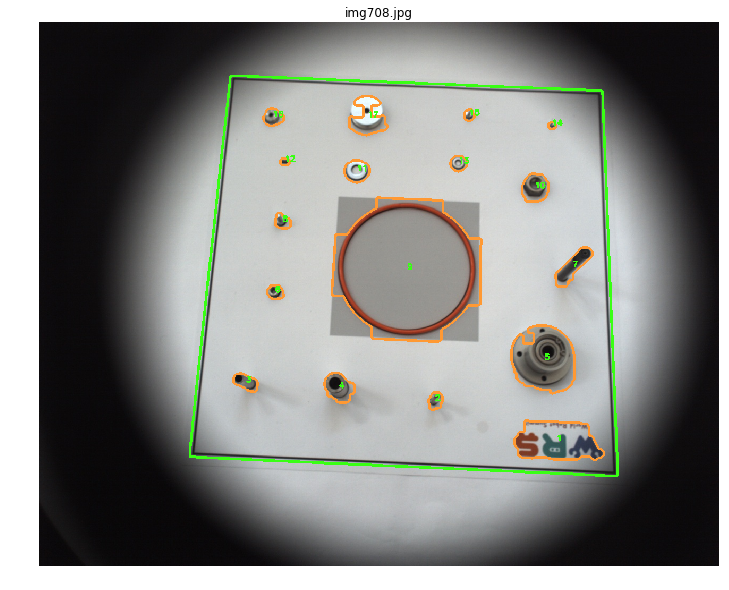

img708.jpg


In [33]:
path = industy_path # industy_path,  canon_path
for image_path in os.listdir(os.path.join(home,path))[:5]:
    
    img_name = image_path
    file_path = os.path.join(home,path, img_name)
    image = cv2.imread(file_path)
 
    kernel_faktor = int(image.shape[1] * (0.018) - 8)
    
    blurred = cv2.bilateralFilter(image,10, 50, 50)
    imgray = cv2.cvtColor(blurred,cv2.COLOR_BGR2GRAY)
    
    form_factor = imgray.shape[0]/1024

    brightness1 = imgray.mean()/kernel_faktor*4
    
    thresh = cv2.Canny(imgray,brightness1,brightness1)
    
    kernel = np.ones((int(5 * form_factor),int(5 * form_factor)),np.uint8)
    dilation = cv2.dilate(thresh,kernel,iterations = 2)
     
        
    h, b = thresh.shape
    faktor = 0.5
    _,contours,_ = cv2.findContours(dilation,
                                    cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    mask = np.zeros(imgray.shape,np.uint8)
    sub_contour = [] 
    for c in contours:
        if ((
            c[:,:,0].max()-c[:,:,0].min()) > b * faktor and (
            c[:,:,1].max()-c[:,:,1].min()) > h * faktor):
            
            #print(len(c))    
            sub_contour.append(c)

    area = (cv2.drawContours(mask, sub_contour, 0, (1,1,1), -1))    
   
    kernel =  cv2.getStructuringElement(cv2.MORPH_ELLIPSE,
                                        (int(20 * form_factor),
                                         int(20 * form_factor)))
    erosion = cv2.erode(area ,kernel,iterations = 2)
    
    area_new = erosion
    
    _,contours,_ = cv2.findContours(area_new,
                                    cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    
    for c in contours:
        if ((c[:,:,0].max()-c[:,:,0].min()) > b * faktor and (
            c[:,:,1].max()-c[:,:,1].min()) > h * faktor):
            sub_contour.append(c)
    frame =  sub_contour
    
    if area.sum() < 50000 / form_factor:
        print(img_name + ' bad image, no frame detected')

    else:
        blurred = cv2.bilateralFilter(imgray,10, 10, 10)
        
        brightness = (imgray * area_new).mean() / 2  * form_factor
        thresh2 = cv2.Canny(blurred,30,30)# brightness, brightness)
        
        kernel =  cv2.getStructuringElement(cv2.MORPH_RECT, (20,20))
        dilation1 = cv2.dilate(thresh2*area_new,kernel,iterations = 1)

        kernel =  cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
        erosion = cv2.erode(dilation1,kernel,iterations = 12
                           )
                
        kernel =  cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10,10))
        dilation2 = cv2.dilate(erosion,kernel,iterations = 1)

        
        sub_contour = []
        _,contours,_ = cv2.findContours(dilation2, cv2.RETR_TREE,
                                        cv2.CHAIN_APPROX_SIMPLE)
        #for c in contours:
         #   if len(c) > 12 * form_factor:  
          #      sub_contour.append(c)
        sub_contour= contours
        
        center = []
        counter = 0
        for c in sub_contour:
            counter += 1
            # compute the center of the contour
            M = cv2.moments(c)
            try:
                cx = int(M["m10"] / M["m00"])
                cy = int(M["m01"] / M["m00"])
                center.append([cx , cy ])
            except:
                print('moment is zero')

        center = np.array(center)

        to_drop = []
        for e,c in enumerate(sub_contour):
            for n,test in enumerate(sub_contour):
                if n!= e:
                    if c[:,:,0].max() < test[:,:,0].max():
                        if c[:,:,0].min()  >  test[:,:,0].min():
                            if c[:,:,1].max() < test[:,:,1].max():
                                if c[:,:,1].min() > test[:,:,1].min():
                                    if len(c) is not len(test): 
                                        to_drop.append(e)
                                    
        sub_con = np.delete(sub_contour, to_drop).tolist()
        #sub_con = sub_contour

        center = np.delete(center,to_drop,0)
        if len(center) is not 17  :
            print('ERROR: ', len(center), 'parts detectet', img_name) 
        else:
            img = cv2.drawContours(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), sub_con, -3, (255, 153, 51), int(3 ))

            for e,ce in enumerate(center,1):
                cv2.putText(img, str(e), (ce[0] , ce[1]),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (57, 255,20), int(2 ))

            cv2.drawContours(img, frame, 0, (57, 255,20), int(3 ))

            fig = plt.figure(figsize=(20,10))
            ax1 = fig.add_subplot(1, 1, 1)
            ax1.axis('off')
            ax1.set_title(file_path.split('/')[-1])
            ax1.imshow(img)
            plt.show()
            print(img_name)

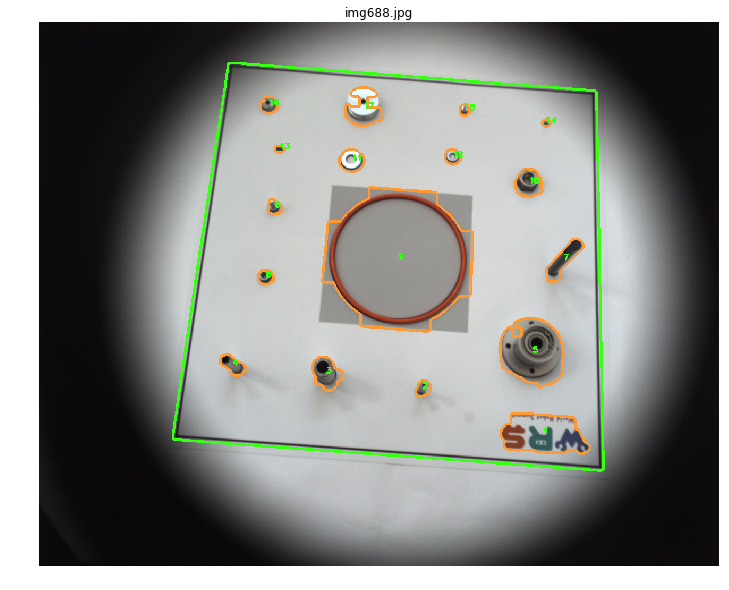

img688.jpg


In [128]:
path = industy_path # industy_path,  canon_path

image_path  = os.listdir(os.path.join(home,path))[0]

img_name = image_path
file_path = os.path.join(home,path, img_name)
image = cv2.imread(file_path)

kernel_faktor = int(image.shape[1] * (0.018) - 8)

blurred = cv2.bilateralFilter(image,10, 50, 50)
imgray = cv2.cvtColor(blurred,cv2.COLOR_BGR2GRAY)

form_factor = imgray.shape[0]/1024

brightness1 = imgray.mean()/kernel_faktor*4

thresh = cv2.Canny(imgray,brightness1,brightness1)

kernel = np.ones((int(5 * form_factor),int(5 * form_factor)),np.uint8)
dilation = cv2.dilate(thresh,kernel,iterations = 2)


h, b = thresh.shape
faktor = 0.5
_,contours,_ = cv2.findContours(dilation,
                                cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
mask = np.zeros(imgray.shape,np.uint8)
sub_contour = [] 
for c in contours:
    if ((
        c[:,:,0].max()-c[:,:,0].min()) > b * faktor and (
        c[:,:,1].max()-c[:,:,1].min()) > h * faktor):

        #print(len(c))    
        sub_contour.append(c)

area = (cv2.drawContours(mask, sub_contour, 0, (1,1,1), -1))    

kernel =  cv2.getStructuringElement(cv2.MORPH_ELLIPSE,
                                    (int(20 * form_factor),
                                     int(20 * form_factor)))
erosion = cv2.erode(area ,kernel,iterations = 2)

area_new = erosion

_,contours,_ = cv2.findContours(area_new,
                                cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

for c in contours:
    if ((c[:,:,0].max()-c[:,:,0].min()) > b * faktor and (
        c[:,:,1].max()-c[:,:,1].min()) > h * faktor):
        sub_contour.append(c)
frame =  sub_contour

if area.sum() < 50000 / form_factor:
    print(img_name + ' bad image, no frame detected')

else:
    blurred = cv2.bilateralFilter(imgray,10, 10, 10)

    brightness = (imgray * area_new).mean() / 2  * form_factor
    thresh2 = cv2.Canny(blurred,30,30)# brightness, brightness)

    kernel =  cv2.getStructuringElement(cv2.MORPH_RECT, (20,20))
    dilation1 = cv2.dilate(thresh2*area_new,kernel,iterations = 1)

    kernel =  cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    erosion = cv2.erode(dilation1,kernel,iterations = 12
                       )

    kernel =  cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10,10))
    dilation2 = cv2.dilate(erosion,kernel,iterations = 1)


    sub_contour = []
    _,contours,_ = cv2.findContours(dilation2, cv2.RETR_TREE,
                                    cv2.CHAIN_APPROX_SIMPLE)
    #for c in contours:
     #   if len(c) > 12 * form_factor:  
      #      sub_contour.append(c)
    sub_contour= contours

    center = []
    counter = 0
    for c in sub_contour:
        counter += 1
        # compute the center of the contour
        M = cv2.moments(c)
        try:
            cx = int(M["m10"] / M["m00"])
            cy = int(M["m01"] / M["m00"])
            center.append([cx , cy ])
        except:
            print('moment is zero')

    center = np.array(center)

    to_drop = []
    for e,c in enumerate(sub_contour):
        for n,test in enumerate(sub_contour):
            if n!= e:
                if c[:,:,0].max() < test[:,:,0].max():
                    if c[:,:,0].min()  >  test[:,:,0].min():
                        if c[:,:,1].max() < test[:,:,1].max():
                            if c[:,:,1].min() > test[:,:,1].min():
                                if len(c) is not len(test): 
                                    to_drop.append(e)

    sub_con = np.delete(sub_contour, to_drop).tolist()
    #sub_con = sub_contour

    center = np.delete(center,to_drop,0)
    if len(center) is not 17  :
        print('ERROR: ', len(center), 'parts detectet', img_name) 
    else:
        img = cv2.drawContours(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), sub_con, -3, (255, 153, 51), int(3 ))

        for e,ce in enumerate(center,1):
            cv2.putText(img, str(e), (ce[0] , ce[1]),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (57, 255,20), int(2 ))

        cv2.drawContours(img, frame, 0, (57, 255,20), int(3 ))

        fig = plt.figure(figsize=(20,10))
        ax1 = fig.add_subplot(1, 1, 1)
        ax1.axis('off')
        ax1.set_title(file_path.split('/')[-1])
        ax1.imshow(img)
        plt.show()
        print(img_name)

In [129]:
len(sub_con)

17

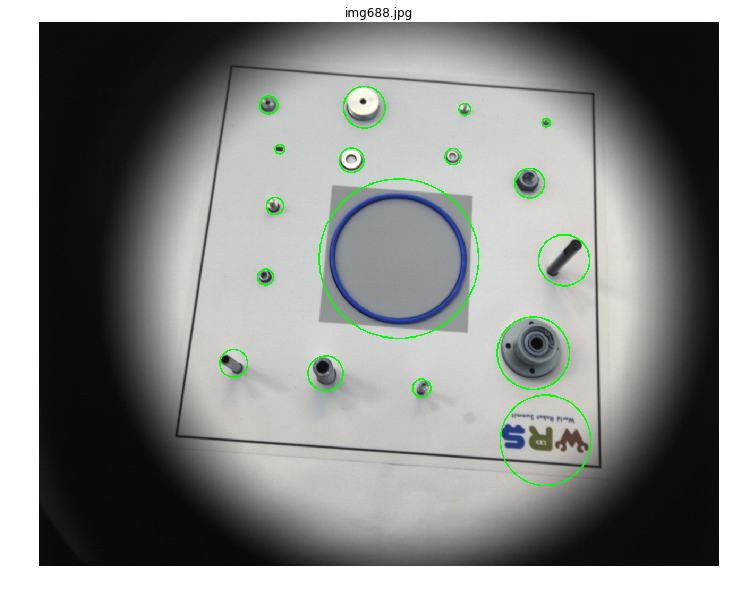

In [130]:
circles = image
centers = []
radien = []
for c in sub_con:
    (x,y),radius = cv2.minEnclosingCircle(c)
    center = (int(x),int(y))
    centers.append(center)
    radius = int(radius)
    radien.append(radius)
    circles = cv2.circle(circles,center,radius,(0,255,0),2)
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1, 1, 1)
ax1.axis('off')
ax1.set_title(file_path.split('/')[-1])
ax1.imshow(circles)
plt.show()

In [131]:
scaled_rad

22.5

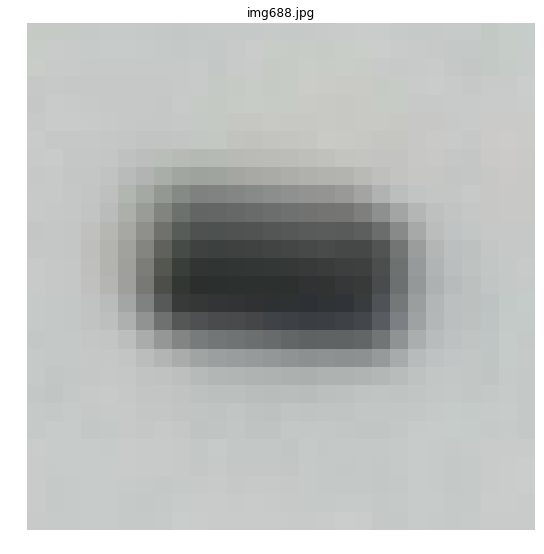

In [134]:
image = cv2.imread(file_path)

radius = radien[12]
center = centers[12]

scale = 1.5
scaled_rad = radius * scale

if scaled_rad <14:
    scaled_rad = 14

try:
    img_cutted = image[center[1] - scaled_rad : center[1] + scaled_rad,
                       center[0] - scaled_rad : center[0] + scaled_rad,
                       : ] 
except:
    img_cutted = image[center[1] - radius : center[1] + radius,
                       center[0] - radius : center[0] + radius,
                       : ] 
    
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(1, 2, 1)
ax1.axis('off')
ax1.set_title(file_path.split('/')[-1])
ax1.imshow(img_cutted)
plt.show()

In [133]:
img_cutted.shape

(30, 30, 3)